In [7]:
import math
import numpy as np
import copy
import matplotlib.pyplot as plt


def distance2pts(vector1, vector2, p=2):
    #Euclidian p = 2
    #Manhatten p = 1
    num = 0
    for i in range(0,len(vector1)):
        num += abs(vector1[i]-vector2[i]) ** p
    return num ** (1/p)


pointcloudsdummy = np.random.randint(0,500,3000).reshape((500,6))


def kMeans(data, k, features):
    dataset_length = len(data)
    print("Dataset length is: ", dataset_length)

    dataConsidered = data[:,features]

    pick_centroids = np.random.randint(0,dataset_length,k)

    no_feat = len(features)

    print("this is k: ", k)

    centroids = np.empty([k,no_feat])
  
    for i, c in enumerate(pick_centroids):
        centroids[i] = dataConsidered[c]

    clustergroup = np.zeros(dataset_length)
    clustergroup_new = np.zeros(dataset_length)
    
    round = 0
    running = 1
    while running == 1:
        print("start while loop")
        print("round {} centroids: ".format(round), centroids)
        old_centroids = copy.deepcopy(centroids)

        #for each point:
        for i, location in enumerate(dataConsidered):
            distance = float('inf') # our distance from each point to centroid
            #now check for each centroid
            for i2, centroid in enumerate(centroids):
                temp_dist = distance2pts(location, centroid)
                if temp_dist < distance:
                    distance = temp_dist
                    clustergroup_new[i] = i2
         
  
        #update centroids data
        #take all items in dictionary with that centroids, then calculate new center, then update centroid data
        for i, centroid in enumerate(centroids):
            temp_list = np.empty([1,no_feat])
            for i2, item in enumerate(clustergroup_new):
                if item == i:
                    temp_list = np.append(temp_list, [dataConsidered[i2]], axis=0)
            centroids[i] = temp_list.mean(axis=0)
          
        #       Ending correctly or looping

        if np.all(old_centroids == centroids) == True:
            print("Running has been set to zero!!!!!")
            running = 0
            return clustergroup_new, centroids, dataConsidered
        else:
            clustergroup = clustergroup_new

        round += 1
        print("this was round: ", round)


clustergroup_new, centroids, dataConsidered = kMeans(pointcloudsdummy,5, [0, 1,2,4,5])

print(dataConsidered)

Dataset length is:  500
this is k:  5
start while loop
round 0 centroids:  [[103. 229.  80.  90. 393.]
 [456. 140. 201. 315. 318.]
 [155. 453.  64. 386. 157.]
 [424.   7.  72.  18. 344.]
 [281. 476. 105. 158. 465.]]
this was round:  1
start while loop
round 1 centroids:  [[115.16161616 188.66919192 229.95454545 135.93686869 283.90909091]
 [348.20080808 186.90834596 298.75477273 279.24468434 239.87954545]
 [173.27707163 357.28356281 224.15371351 334.19490536 145.76953711]
 [379.58415369  98.25101705 132.5198095   90.03620925 250.65968294]
 [299.4153774  417.76954714 248.30499702 155.92244077 363.82280755]]
this was round:  2
start while loop
round 2 centroids:  [[115.0256955  176.58265476 242.82239359 136.29704724 286.3810937 ]
 [345.19736405 165.65199053 325.78043939 295.10772568 238.72099362]
 [174.43022995 347.11472261 235.84689445 344.84124139 156.68673104]
 [386.38778143 141.62086861 115.09280785 137.45779748 227.86804335]
 [310.24583657 402.88069964 265.43784837 166.67192871 345.5

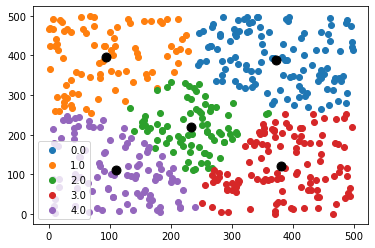

In [5]:
#Plot graphs
def plot_kmeans(clustergroup_new, centroids, dataConsidered):
    #Getting the Centroids
    u_labels = np.unique(clustergroup_new)

    # #plotting the results:
    for p in u_labels:
        plt.scatter(dataConsidered[clustergroup_new == p , 0] , dataConsidered[clustergroup_new == p , 1] , label = p)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "black")
    plt.legend()
    plt.show()

plot_kmeans(clustergroup_new, centroids, dataConsidered)


In [ ]:
# Check if clusters are correct